In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 1. Загрузка данных
df_prol = pd.read_csv('prolongations.csv')
df_prol.head(5)

,id,month,AM
0,42,ноябрь 2022,Васильев Артем Александрович
1,453,ноябрь 2022,Васильев Артем Александрович
2,548,ноябрь 2022,Михайлов Андрей Сергеевич
3,87,ноябрь 2022,Соколова Анастасия Викторовна
4,429,ноябрь 2022,Соколова Анастасия Викторовна


In [3]:
df_fin = pd.read_csv('financial_data.csv', delimiter=',')
df_fin.head(5)

,id,Причина дубля,Ноябрь 2022,Декабрь 2022,Январь 2023,Февраль 2023,Март 2023,Апрель 2023,Май 2023,Июнь 2023,Июль 2023,Август 2023,Сентябрь 2023,Октябрь 2023,Ноябрь 2023,Декабрь 2023,Январь 2024,Февраль 2024,Account
0,42,NaN,"36 220,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Васильев Артем Александрович
1,657,первая часть оплаты,стоп,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Васильев Артем Александрович
2,657,вторая часть оплаты,стоп,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Васильев Артем Александрович
3,594,NaN,стоп,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Васильев Артем Александрович
4,665,NaN,"10 000,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Васильев Артем Александрович


In [4]:
# 2. Обработка данных из prolongations.csv
df_prol.columns = df_prol.columns.str.strip()
df_prol['month'] = df_prol['month'].str.lower().str.strip()
df_prol.head(5)

,id,month,AM
0,42,ноябрь 2022,Васильев Артем Александрович
1,453,ноябрь 2022,Васильев Артем Александрович
2,548,ноябрь 2022,Михайлов Андрей Сергеевич
3,87,ноябрь 2022,Соколова Анастасия Викторовна
4,429,ноябрь 2022,Соколова Анастасия Викторовна


In [5]:
# 3. Обработка финансовых данных
# Определяем числовые столбцы: все, кроме 'id', 'Причина дубля' и 'Account'
non_numeric = ['id', 'Причина дубля', 'Account']
num_cols = [col for col in df_fin.columns if col not in non_numeric]

In [6]:
# Преобразуем найденные столбцы в числовой формат
# удаление неразрывного пробела
# удаление обычного пробела
# замена запятой на точку
for col in num_cols:
    df_fin[col] = df_fin[col].astype(str)\
        .str.replace(' ', '', regex=False)\
        .str.replace(' ', '', regex=False)\
        .str.replace(',', '.', regex=False)
    df_fin[col] = pd.to_numeric(df_fin[col], errors='coerce')

In [7]:
# 4. Агрегация финансовых данных по проекту (id)
df_fin_agg = df_fin.groupby('id', as_index=False)[num_cols].sum()

In [8]:
# 5. Объединяем данные из prolongations и агрегированные финансовые данные по id
df_merged = pd.merge(df_prol, df_fin_agg, on='id', how='left')
df_merged.head(5)

,id,month,AM,Ноябрь 2022,Декабрь 2022,Январь 2023,Февраль 2023,Март 2023,Апрель 2023,Май 2023,Июнь 2023,Июль 2023,Август 2023,Сентябрь 2023,Октябрь 2023,Ноябрь 2023,Декабрь 2023,Январь 2024,Февраль 2024
0,42,ноябрь 2022,Васильев Артем Александрович,36220.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,453,ноябрь 2022,Васильев Артем Александрович,0.0,39245.0,44320.0,177635.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,548,ноябрь 2022,Михайлов Андрей Сергеевич,674000.0,674000.0,674000.0,674000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,87,ноябрь 2022,Соколова Анастасия Викторовна,70050.0,0.0,73380.0,83480.0,89300.0,89300.0,78605.0,72485.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,429,ноябрь 2022,Соколова Анастасия Викторовна,30280.0,35580.0,35830.0,42830.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# 6. Определяем анализируемые месяцы 2023
analysis_months = [col for col in num_cols if "2023" in col]
print(analysis_months)

['Январь 2023', 'Февраль 2023', 'Март 2023', 'Апрель 2023', 'Май 2023', 'Июнь 2023', 'Июль 2023', 'Август 2023', 'Сентябрь 2023', 'Октябрь 2023', 'Ноябрь 2023', 'Декабрь 2023']


In [10]:
# Инициализируем списки для результатов по месяцам
results_first = []   # коэффициенты первого типа
results_second = []  # коэффициенты второго типа
dept_results = []    # агрегированные коэффициенты по отделу

## Расчет коэффициентов пролонгации

Проведём рассчеты для двух типов коэффициентов для каждого анализируемого месяца:

### Первый тип:
Для проектов, завершившихся в предыдущем месяце (обозначим его как `m_prev`).  
**Коэффициент** = (сумма отгрузок в анализируемом месяце `m`) / (сумма отгрузок в месяце `m_prev`).

### Второй тип:
Для проектов, завершившихся два месяца назад (обозначим его как `m_two`), и при этом без отгрузки в предыдущем месяце (значение `m_prev` либо `NaN`, либо `0`).  
**Коэффициент** = (сумма отгрузок в анализируемом месяце `m`) / (сумма отгрузок в месяце `m_two`).

Также рассчитываются агрегированные коэффициенты для всего отдела.


In [11]:
# 7. Расчет коэффициентов по месяцам
for i in range(1, len(analysis_months)):
    m = analysis_months[i]          # анализируемый месяц
    m_prev = analysis_months[i-1]     # предыдущий месяц
    m_two = analysis_months[i-2] if i >= 2 else None  # два месяца назад
    
    # Первый тип: выбираем проекты, завершившиеся в m_prev
    df_first = df_merged[df_merged['month'] == m_prev.lower()]
    fc = df_first.groupby('AM').agg({m_prev: 'sum', m: 'sum'}).reset_index()
    fc['analysis_month'] = m
    fc['first_coeff'] = fc[m] / fc[m_prev]
    results_first.append(fc[['AM', 'analysis_month', 'first_coeff']])
    
    # Второй тип: выбираем проекты, завершившиеся в m_two и без отгрузки в m_prev (NaN или 0)
    if m_two is not None:
        df_second = df_merged[(df_merged['month'] == m_two.lower()) & 
                              ((df_merged[m_prev].isna()) | (df_merged[m_prev] == 0))]
        sc = df_second.groupby('AM').agg({m_two: 'sum', m: 'sum'}).reset_index()
        sc['analysis_month'] = m
        sc['second_coeff'] = sc[m] / sc[m_two]
        results_second.append(sc[['AM', 'analysis_month', 'second_coeff']])
    
    # Расчет коэффициентов для отдела за данный месяц
    dept_first_den = df_first[m_prev].sum()
    dept_first_num = df_first[m].sum()
    dept_first_coeff = dept_first_num / dept_first_den if dept_first_den != 0 else None
    
    if m_two is not None:
        df_second_all = df_merged[(df_merged['month'] == m_two.lower()) & 
                                  ((df_merged[m_prev].isna()) | (df_merged[m_prev] == 0))]
        dept_second_den = df_second_all[m_two].sum()
        dept_second_num = df_second_all[m].sum()
        dept_second_coeff = dept_second_num / dept_second_den if dept_second_den != 0 else None
    else:
        dept_second_coeff = None
        
    dept_results.append({
        'analysis_month': m,
        'dept_first_coeff': dept_first_coeff,
        'dept_second_coeff': dept_second_coeff
    })

In [12]:
# Объединяем месячные результаты
df_results_first = pd.concat(results_first, ignore_index=True)
df_results_second = pd.concat(results_second, ignore_index=True) if results_second else pd.DataFrame()
df_dept = pd.DataFrame(dept_results)
df_dept.head(5)

,analysis_month,dept_first_coeff,dept_second_coeff
0,Февраль 2023,0.737893,NaN
1,Март 2023,0.669572,0.161662
2,Апрель 2023,0.444653,0.092300
3,Май 2023,0.601645,0.000000
4,Июнь 2023,0.261307,0.038059


## Расчет годовых коэффициентов для отдела

Здесь суммируются значения по всем подходящим месяцам:
  
**Основная сумма (denom):** для всех анализируемых месяцев (начиная со второго) суммируется отгрузка в предыдущем месяце.

**Сумма результатов (num):** для каждого месяца – отгрузки в анализируемом месяце.

`zip(analysis_months[:-1], analysis_months[1:])` — это список пар, сформированный из двух срезов одного списка.

- `analysis_months[:-1]` — содержит все элементы, кроме последнего (даёт список текущих месяцев).
- `analysis_months[1:]` — содержит все элементы, кроме первого (даёт список следующих месяцев).

Таким образом, `zip()` объединяет эти два списка, создавая последовательные пары месяцев.


In [13]:
# 8. Годовые коэффициенты для отдела (агрегат по всем месяцам)
# Для первого типа:
dept_total_den_first = sum(df_merged.loc[df_merged['month'] == m.lower(), m].sum() for m in analysis_months[1:])
dept_total_num_first = sum(df_merged.loc[df_merged['month'] == m.lower(), m_next].sum() 
                             for m, m_next in zip(analysis_months[:-1], analysis_months[1:]))
dept_annual_first_coeff = dept_total_num_first / dept_total_den_first if dept_total_den_first != 0 else None

In [14]:
# Для второго типа:
dept_total_den_second = 0
dept_total_num_second = 0
for i in range(2, len(analysis_months)):
    m_two = analysis_months[i-2]
    m = analysis_months[i]
    m_prev = analysis_months[i-1]
    cond = (df_merged['month'] == m_two.lower()) & ((df_merged[m_prev].isna()) | (df_merged[m_prev]==0)) # условие для подсчета суммы отгрузок
    dept_total_den_second += df_merged.loc[cond, m_two].sum()
    dept_total_num_second += df_merged.loc[cond, m].sum()
dept_annual_second_coeff = dept_total_num_second / dept_total_den_second if dept_total_den_second != 0 else None

In [15]:
annual_dept = pd.DataFrame([{
    'annual_dept_first_coeff': dept_annual_first_coeff,
    'annual_dept_second_coeff': dept_annual_second_coeff
}])
annual_dept.head()

,annual_dept_first_coeff,annual_dept_second_coeff
0,0.475934,0.066332


## Расчет годовых коэффициентов по менеджерам

Для каждого менеджера (определяется по столбцу AM) рассчитываются годовые коэффициенты отдельно для первого и второго типа.

#### Разбор построчно:
`total_den_first += df_merged.loc[cond, m_prev].sum()` 
   - Выбирает строки в `df_merged`, которые соответствуют условию `cond`.
   - Берет из них значения в колонке `m_prev` (сумма отгрузок в предыдущем месяце).
   - Складывает их (`sum()`) и прибавляет к `total_den_first`.  
   - `total_den_first` – это общий знаменатель коэффициента пролонгации первого типа.


In [16]:
# 9. Годовые коэффициенты по менеджерам
annual_first = []
annual_second = []
managers = df_merged['AM'].dropna().unique()

In [17]:
for mng in managers:
    total_den_first, total_num_first = 0, 0
    total_den_second, total_num_second = 0, 0
    for i in range(1, len(analysis_months)):
        m = analysis_months[i]
        m_prev = analysis_months[i-1]
        cond = (df_merged['AM'] == mng) & (df_merged['month'] == m_prev.lower()) # Условие для подсчета суммы отгрузок
        total_den_first += df_merged.loc[cond, m_prev].sum() # Сумма отгрузок за предыдущий месяц
        total_num_first += df_merged.loc[cond, m].sum() # Сумма отгрузок за текущий месяц
    # В список словарей запишем полученные данные для дальнейшнего использования в DataFrame
    annual_first.append({
        'AM': mng, 
        'annual_first_coeff': total_num_first / total_den_first if total_den_first != 0 else None
    })
    
    for i in range(2, len(analysis_months)):
        m = analysis_months[i]
        m_two = analysis_months[i-2]
        m_prev = analysis_months[i-1]
        cond = (df_merged['AM'] == mng) & (df_merged['month'] == m_two.lower()) & \
               ((df_merged[m_prev].isna()) | (df_merged[m_prev]==0))
        total_den_second += df_merged.loc[cond, m_two].sum()
        total_num_second += df_merged.loc[cond, m].sum()
    annual_second.append({
        'AM': mng, 
        'annual_second_coeff': total_num_second / total_den_second if total_den_second != 0 else None
    })

In [18]:
df_annual_first = pd.DataFrame(annual_first)
df_annual_first.head(5)

,AM,annual_first_coeff
0,Васильев Артем Александрович,0.514320
1,Михайлов Андрей Сергеевич,0.659526
2,Соколова Анастасия Викторовна,0.608905
3,Иванова Мария Сергеевна,0.427741
4,Попова Екатерина Николаевна,0.517337


In [19]:
df_annual_second = pd.DataFrame(annual_second)
df_annual_second.head(5)

,AM,annual_second_coeff
0,Васильев Артем Александрович,0.067750
1,Михайлов Андрей Сергеевич,0.000000
2,Соколова Анастасия Викторовна,0.000000
3,Иванова Мария Сергеевна,0.000000
4,Попова Екатерина Николаевна,0.157675


In [20]:
df_annual = pd.merge(df_annual_first, df_annual_second, on='AM', how='outer')
df_annual.head(5)

,AM,annual_first_coeff,annual_second_coeff
0,Васильев Артем Александрович,0.514320,0.06775
1,Иванова Мария Сергеевна,0.427741,0.00000
2,Кузнецов Михаил Иванович,0.434149,0.00000
3,Михайлов Андрей Сергеевич,0.659526,0.00000
4,Петрова Анна Дмитриевна,1.111182,NaN


In [21]:
# 10. Сохранение итогового отчета в Excel (несколько листов)
with pd.ExcelWriter('analytical_report.xlsx') as writer:
    df_results_first.to_excel(writer, sheet_name='Ежемесячный_Первый_Тип', index=False)
    df_results_second.to_excel(writer, sheet_name='Ежемесячный_Второй_Тип', index=False)
    df_dept.to_excel(writer, sheet_name='Ежемесячные_Показатели_Отдела', index=False)
    df_annual.to_excel(writer, sheet_name='Годовые_Показатели_по_Менеджерам', index=False)
    annual_dept.to_excel(writer, sheet_name='Годовые_Показатели_Отдела', index=False)
    df_merged.to_excel(writer, sheet_name='Объединенные_Данные', index=False)

C:\Users\adbie\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


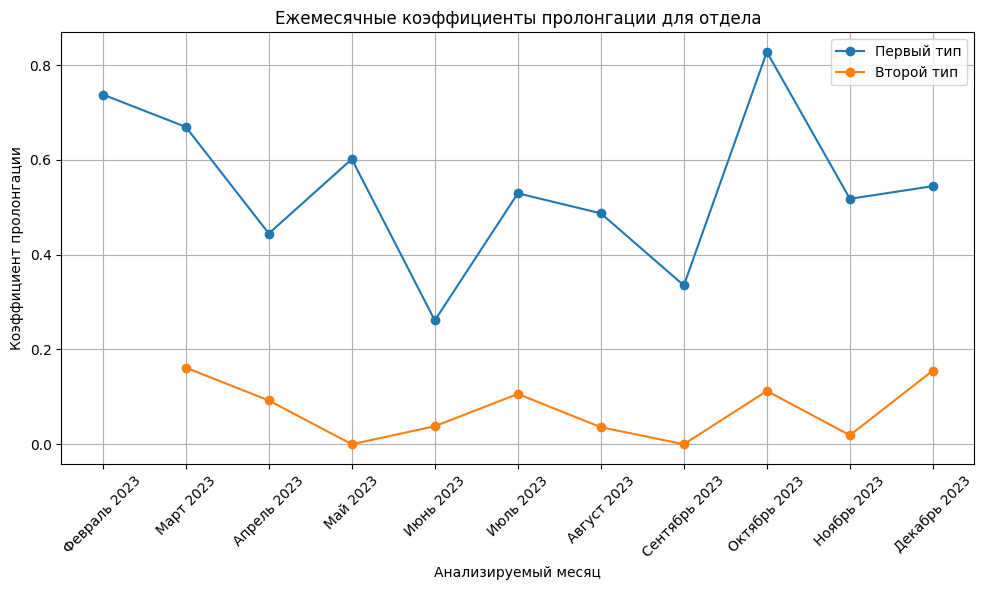

In [22]:
# 11. Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(df_dept['analysis_month'], df_dept['dept_first_coeff'], marker='o', label='Первый тип')
plt.plot(df_dept['analysis_month'], df_dept['dept_second_coeff'], marker='o', label='Второй тип')
plt.title('Ежемесячные коэффициенты пролонгации для отдела')
plt.xlabel('Анализируемый месяц')
plt.ylabel('Коэффициент пролонгации')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

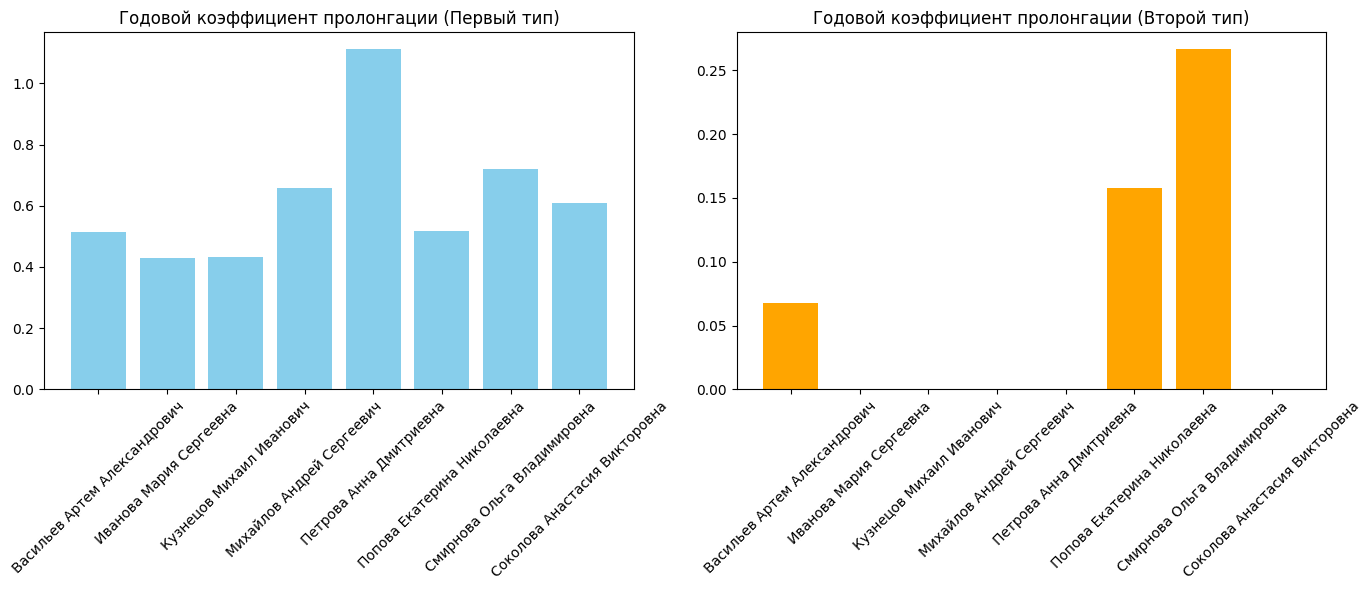

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].bar(df_annual['AM'], df_annual['annual_first_coeff'], color='skyblue')
ax[0].set_title('Годовой коэффициент пролонгации (Первый тип)')
ax[0].tick_params(axis='x', rotation=45)
ax[1].bar(df_annual['AM'], df_annual['annual_second_coeff'], color='orange')
ax[1].set_title('Годовой коэффициент пролонгации (Второй тип)')
ax[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [24]:
print("Годовой коэффициент пролонгации для отдела:")
print("Первый тип: {:.2f}".format(dept_annual_first_coeff))
print("Второй тип: {:.2f}".format(dept_annual_second_coeff))

Годовой коэффициент пролонгации для отдела:
Первый тип: 0.48
Второй тип: 0.07
